In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import pyproj
import matplotlib.image as image
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona
from itertools import chain

## CO JESZCZE:
* ULEPSZYC PLIK SHP, (ten zapisany w geo jednostkach wrzucic na gita i z niego korzystac, drugi tylko na zapas)NAZWY DZIELNIC ZACZYNAJACE SIE WIELKĄ, POLSKIE LITERY, KODOWANIE, reszte kolumn wyrzucić z pliku shp. (GOTOWE)
* ZMIENIĆ NIECO GRANICĘ I USUNĄĆ KROPKĘ Z DZIELNICY NA POŁUDNIOWYM ZACHODZIE (POTEM)
* DOPRACOWAĆ JEDNORAZOWE WYKONYWANIE
* WSZYSTKIE DANE W RAMCE POPRAWNIE ZJOINOWANE WAŻNE!!! (GOTOWE)
* SKALA - SPOJRZEĆ JAKIE SA NORMY UNIJNE, WEDŁUG NICH ZROBIĆ SKALĘ Z ŁADNYMI KOLORAMI, TAK PO DWA ODCIENIE NA KAŻDY STOPIEŃ SKALI? CO TO AIR QUALITY INDEX (ŁATWE) (GOTOWE)
* KOLORY INSPOROWANE SIW.RYBNIK.EU (GOTOWE)
* DRUKOWAĆ TEŻ WYNIK DLA NAJGORSZYCH DZIELNIC I NAPISAĆ NA DOLE JAKA JEST NORMA (ŁATWE) NIE
* WYKRESY Z DZIENNĄ TEMPERATURĄ I CIŚNIENIEM ATMOSFERYCZNYM DLA RYBNIKA W CIĄGU DOBY?
* ZMIENIĆ KOLEJNOŚ WYKONYWANIA!!! WAŻNE
* USZEREGOWAĆ DANE ALFABETYCZNIE DZIELNICAMI! GOTOWE
* JAK ZAZNACZAĆ PUNKTY NA MAPIE? (GOTOWE)
  * JAK PISAĆ TEKST NA MAPIE? GOTOWE
  * MAPA Z MAKSYMALNĄ PRZEWIDYWANĄ TEMPERATURĄ I AKTUALNĄ W NAWIASIE? I CIŚNIENIEM?
  
  * CZY BĘDZIE CZYTELNIE WKLEJAJĄC NA MAPĘ LICZBY? MOŻE TYLKO SKRAJNE, TEMPERATURY DLA ŚRÓDMIEŚCIA PODAWAĆ JAKO DLA CAŁOŚCI? NIE BĘDZIE CZYTELNIE




# data/city.shp - wspolrzedne inne
# city_geo.shp - wspolrzedne geograficzne

# https://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html#.WsX2taOsZPZ

In [56]:
import requests

headers = {
    'Accept': 'application/json',
    'apikey': '***',
}

#rybnik's geographical coordinates
params = (
    ('southwestLat', '50.033'),
    ('southwestLong', '18.428'),
    ('northeastLat', '50.180'),
    ('northeastLong', '18.662'),
)

response = requests.get('https://airapi.airly.eu/v1/sensors/current', headers=headers, params=params)

In [57]:
data_js = response.json()

In [58]:
#only official rybnik's sensors
df_temp = pd.DataFrame.from_records(data_js).query("name == 'Rybnik' and vendor == 'Airly'")

#unfold address dict
df_temp = pd.concat([df_temp.drop(['address'], axis=1), df_temp['address'].apply(pd.Series)], axis=1)
#unfold location dict
sensors = pd.concat([df_temp.drop(['location'], axis=1), df_temp['location'].apply(pd.Series)], axis=1).reset_index(drop=True)

In [59]:
sensors

,id,name,pollutionLevel,vendor,country,locality,route,streetNumber,latitude,longitude
0,2083,Rybnik,2,Airly,Poland,"Rybnik, Chwałęcice",Gzelska 7,ZSP 15,50.133136,18.485427
1,2091,Rybnik,1,Airly,Poland,"Rybnik, Maroko-Nowiny",Orzepowicka 15a,ZS 3,50.100009,18.517341
2,2094,Rybnik,1,Airly,Poland,"Rybnik, Smolna",W. Reymonta 69,SP 34,50.090576,18.526136
3,2107,Rybnik,1,Airly,Poland,"Rybnik, Śródmieście",T. Kościuszki 5,ZST,50.096996,18.549377
4,2174,Rybnik,1,Airly,Poland,"Rybnik, Golejów",Komisji Edukacji Narodowej 29,ZSP 4,50.143863,18.540533
5,2198,Rybnik,1,Airly,Poland,"Rybnik, Ochojec",B. Kuglera 8a,ZSP 3,50.164684,18.546913
6,2202,Rybnik,2,Airly,Poland,"Rybnik, Paruszowiec-Piaski",Wolna 17,SP 3,50.096382,18.583908
7,2206,Rybnik,2,Airly,Poland,"Rybnik, Niewiadom",Sportowa 52,SP 23,50.074623,18.465013
8,2211,Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Osiedle",J. Lompy 6,ZSP 8,50.048667,18.605903
9,2331,Rybnik,1,Airly,Poland,"Rybnik, Orzepowice",Borki 37D,ZSP 7,50.110969,18.516067


In [7]:
#sensors['district'] = sensors.locality.apply(lambda x: x.split(",")[1])

In [60]:
#sensors = sensors.sort_values('district')
sensors.set_index('id',inplace=True)

In [61]:
sensors

,name,pollutionLevel,vendor,country,locality,route,streetNumber,latitude,longitude
id,,,,,,,,,
2083,Rybnik,2,Airly,Poland,"Rybnik, Chwałęcice",Gzelska 7,ZSP 15,50.133136,18.485427
2091,Rybnik,1,Airly,Poland,"Rybnik, Maroko-Nowiny",Orzepowicka 15a,ZS 3,50.100009,18.517341
2094,Rybnik,1,Airly,Poland,"Rybnik, Smolna",W. Reymonta 69,SP 34,50.090576,18.526136
2107,Rybnik,1,Airly,Poland,"Rybnik, Śródmieście",T. Kościuszki 5,ZST,50.096996,18.549377
2174,Rybnik,1,Airly,Poland,"Rybnik, Golejów",Komisji Edukacji Narodowej 29,ZSP 4,50.143863,18.540533
2198,Rybnik,1,Airly,Poland,"Rybnik, Ochojec",B. Kuglera 8a,ZSP 3,50.164684,18.546913
2202,Rybnik,2,Airly,Poland,"Rybnik, Paruszowiec-Piaski",Wolna 17,SP 3,50.096382,18.583908
2206,Rybnik,2,Airly,Poland,"Rybnik, Niewiadom",Sportowa 52,SP 23,50.074623,18.465013
2211,Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Osiedle",J. Lompy 6,ZSP 8,50.048667,18.605903


# More detailed data

In [15]:
ids = list(sensors.index)

from pandas.io.json import json_normalize

headers = {
    'Accept': 'application/json',
    'apikey': '7e6092f86c384ed7bf3bd561d13a931e',
}

allData = []
currentMeasure = []

for i, sensId in enumerate(ids):
    
    params = (
        ('sensorId', str(sensId)),
    )

    response = requests.get('https://airapi.airly.eu/v1/sensor/measurements', headers=headers, params=params)
    data_js = response.json()
    allData.append(pd.DataFrame.from_dict(json_normalize(data_js), orient='columns'))
    currentMeasure.append(allData[i].iloc[:,:-2])
    currentMeasure[i]['id'] = sensId


In [16]:
currentData = pd.concat(currentMeasure)
currentData.set_index('id',inplace=True)
currentData

,currentMeasurements.airQualityIndex,currentMeasurements.humidity,currentMeasurements.pm1,currentMeasurements.pm10,currentMeasurements.pm25,currentMeasurements.pollutionLevel,currentMeasurements.pressure,currentMeasurements.temperature
id,,,,,,,,
2083,29.120000,90.242028,12.068000,27.293000,17.472000,2,102306.466699,9.607500
2091,23.034667,73.649757,9.822400,19.236000,13.820800,1,102278.133276,9.370000
2094,17.164848,86.305335,7.519273,13.605455,10.298909,1,102282.124295,10.277727
2107,22.409333,85.549626,8.965600,18.872000,13.445600,1,102260.933435,11.100000
2174,19.252121,91.171440,8.018182,16.475455,11.551273,1,102287.731196,9.922727
2198,13.654667,88.875448,6.400800,11.067000,8.192800,1,102294.140381,9.127500
2202,32.274667,90.150909,13.031200,29.722000,19.364800,2,102230.200012,9.855000
2206,28.721212,70.441440,10.996364,25.798182,17.232727,2,102236.842318,9.453409
2211,31.518667,78.250000,12.980800,28.644000,18.911200,2,102254.452466,9.425000


# History

In [17]:
hist_max = pd.DataFrame(columns=['airQualityIndex','humidity','pm1','pm10', 'pm25', 'pollutionLevel','pressure', 'temperature'])
for j in range(len(allData)):
    history = pd.pivot_table(pd.DataFrame.from_dict(allData[j].history[0][0]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')
    for i in range(len(allData[j].history[0])-1):
        history = pd.concat([history, pd.pivot_table(pd.DataFrame.from_dict(allData[j].history[0][i+1]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')])
    hist_max = pd.concat([hist_max, history.max(axis=0,level=None).to_frame().T])

In [18]:
hist_max['id'] = ids
hist_max.set_index('id', inplace=True)
hist_max

index,airQualityIndex,humidity,pm1,pm10,pm25,pollutionLevel,pressure,temperature
id,,,,,,,,
2083,55.145600,95.125000,20.188000,59.402000,35.145600,3.0,102292.412154,20.026250
2091,44.333333,100.000000,16.755200,43.781818,26.600000,2.0,102264.278731,20.930000
2094,39.743030,97.375000,15.254400,38.099091,23.845818,2.0,102267.033386,17.522727
2107,43.176000,96.814093,15.187200,42.903000,25.905600,2.0,102248.333435,22.573750
2174,52.541600,97.375000,19.863200,49.840000,32.541600,3.0,102283.449377,17.459091
2198,42.398788,100.000000,15.659636,40.873636,25.439273,2.0,102278.540381,21.876136
2202,44.398667,100.000000,16.251200,43.778000,26.639200,2.0,102225.472739,18.866818
2206,55.672000,96.437287,21.218400,55.349000,35.672000,3.0,102265.660500,17.060000
2211,47.926667,100.000000,16.783200,48.174000,28.756000,2.0,102236.952466,17.140000


# ---------------------------------------

# Wczytywanie shp i robienie z tego mapy bazowej

### Według skryptu londyńskiego

In [19]:
shp = fiona.open('data/city.shp')
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
w, h = coords[2] - coords[0], coords[3] - coords[1]

In [20]:
m = Basemap(
    projection='tmerc',
    lon_0=18,
    lat_0=50.,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - 2*extra * w,
    llcrnrlat=coords[1] - 2*extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)
m.readshapefile(
    'data/city',
    'rybnik',
    color='none',
    zorder=2)

(27,
 5,
 [18.44168423057649, 50.03540818733495, 0.0, 0.0],
 [18.656839587997112, 50.18567083284379, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x16e99208>)

In [62]:
# set up a map dataframe
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.rybnik],
    'district': [ward['name'] for ward in m.rybnik_info],
    'id': [ward['id'] for ward in m.rybnik_info]})

df_map = df_map.sort_values('district')
df_map.set_index('id',inplace=True)


In [63]:
df_map = df_map.join(sensors, lsuffix='sens').join(hist_max, rsuffix='hist').join(currentData, rsuffix='current')

In [68]:
# Create Point objects in map coordinates from dataframe lon and lat values
map_points = pd.Series(
    [Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(sensors['longitude'], sensors['latitude'])])
plaque_points = MultiPoint(list(map_points.values))
wards_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
# calculate points that fall within the London boundary
ldn_points = filter(wards_polygon.contains, plaque_points)

In [69]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in xrange(N + 1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [70]:
df_map = df_map.reset_index()

# Live map

In [71]:
df_map['count'] = df_map['poly'].map(lambda x: int(len(filter(prep(x).contains, ldn_points))))
#df_map['density_m'] = df_map['count'] / df_map['area_m']
#df_map['density_km'] = df_map['count'] / df_map['area_km']
# it's easier to work with NaN values when classifying
#df_map.replace(to_replace={'density_m': {0: np.nan}, 'density_km': {0: np.nan}}, inplace=True)

In [72]:
df_map.head()

,id,district,poly,name,pollutionLevel,vendor,country,locality,route,streetNumber,...,currentMeasurements.airQualityIndex,currentMeasurements.humidity,currentMeasurements.pm1,currentMeasurements.pm10,currentMeasurements.pm25,currentMeasurements.pollutionLevel,currentMeasurements.pressure,currentMeasurements.temperature,patches,count
0,2211,Boguszowice Osiedle,"POLYGON ((10315.74121566368 4191.036626162298,...",Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Osiedle",J. Lompy 6,ZSP 8,...,31.518667,78.250000,12.980800,28.644000,18.911200,2,102254.452466,9.425000,"Poly((10315.7, 4191.04) ...)",1
1,2324,Boguszowice Stare,"POLYGON ((12378.64357142189 3990.647439878347,...",Rybnik,2,Airly,Poland,"Rybnik, Boguszowice Stare",S. Małachowskiego 44,ZSP 6,...,32.208485,78.250000,13.572364,28.655455,19.325091,2,102293.772827,9.722045,"Poly((12378.6, 3990.65) ...)",1
2,2095,Chwałowice,"POLYGON ((7255.384606314936 4685.660155339681,...",Rybnik,2,Airly,Poland,"Rybnik, Chwałowice",J. 1 Maja 91a,LO 4,...,28.700000,79.230129,12.073600,24.556000,17.220000,2,102294.223950,10.096250,"Poly((7255.38, 4685.66) ...)",1
3,2083,Chwałęcice,"POLYGON ((4897.596176724361 13947.57826467449,...",Rybnik,2,Airly,Poland,"Rybnik, Chwałęcice",Gzelska 7,ZSP 15,...,29.120000,90.242028,12.068000,27.293000,17.472000,2,102306.466699,9.607500,"Poly((4897.6, 13947.6) ...)",1
4,2174,Golejów,"POLYGON ((7279.166916842889 13021.9756673068, ...",Rybnik,1,Airly,Poland,"Rybnik, Golejów",Komisji Edukacji Narodowej 29,ZSP 4,...,19.252121,91.171440,8.018182,16.475455,11.551273,1,102287.731196,9.922727,"Poly((7279.17, 13022) ...)",1


# Common Air Quality Index

In [73]:
caqi_labels = ['Bardzo niska (0-25)',
 'Niska [25-50)',
 'Średnia [50-75)',
 'Wysoka [75-100)',
    'Bardzo wysoka (>=100)']

for i, text in enumerate(caqi_labels):
    caqi_labels[i] = text.decode('utf-8')
    
    
from matplotlib import colors
#cmap = colors.ListedColormap(['#4ca74a','#ffd800','#fb7551','#fb5656'])#,'#8e3ac4', '#b10000'])
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])#,'#8e3ac4', '#b10000'])
bounds= [1,2,3,4,5,6]
norm = colors.BoundaryNorm(bounds, cmap.N)

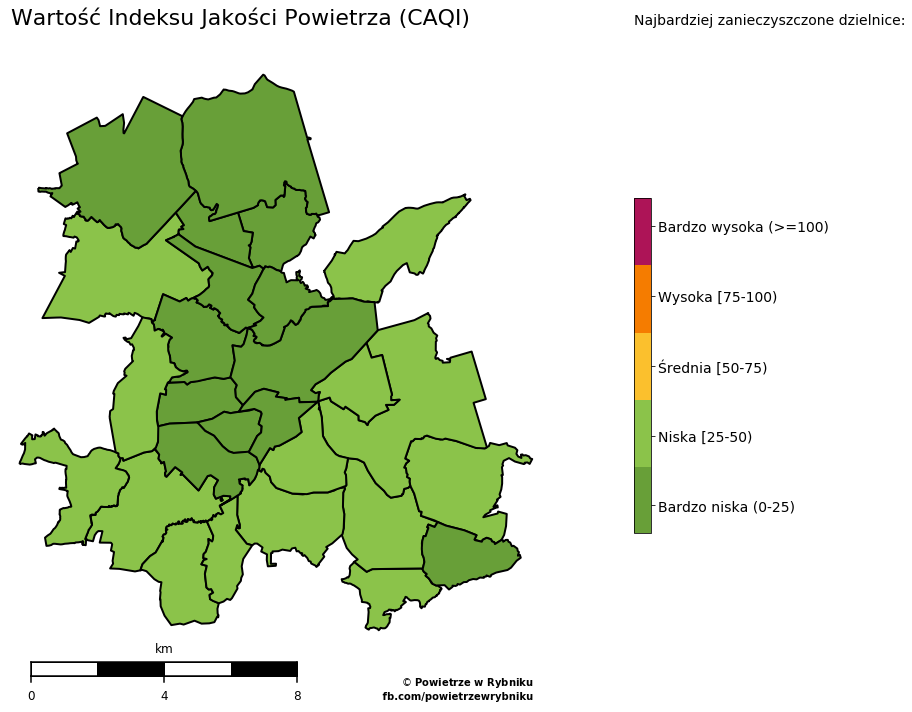

In [74]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['pollutionLevel'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(caqi_labels), cmap=cmap, shrink=0.5, labels=caqi_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(value[19]) for _, value in df_map.query('pollutionLevel > 3').sort_values(by='pollutionLevel', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)



# # Mapscale label
# label = 'Wartość Indeksu Jakości Powietrza (CAQI)'
# mapscale_label = cb.ax.text(
#     0.05, -0.05,
#     label.decode('utf-8'),
#     ha='left', va='top',
#     size=12,
#     weight = 'bold',
#     color='#000000')

# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Wartość Indeksu Jakości Powietrza (CAQI)".decode('utf-8'), fontsize=22, loc='left')


# this will set the image width to 1000px at 100dpi
plt.tight_layout()
fig.set_size_inches(12, 10)
plt.savefig('ryb-caqi.png', dpi=200, alpha=True)
plt.show()

# PM 10

In [75]:
pm10_labels = ['Bardzo niskie (0-25)',
 'Niskie [25-50)',
 'Średnie [50-90)',
 'Wysokie [90-180)',
    'Bardzo wysokie (>=180)']

for i, text in enumerate(pm10_labels):
    pm10_labels[i] = text.decode('utf-8')
    
from matplotlib import colors
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])
bounds= [0,25,50,90,180,1000]
norm = colors.BoundaryNorm(bounds, cmap.N)

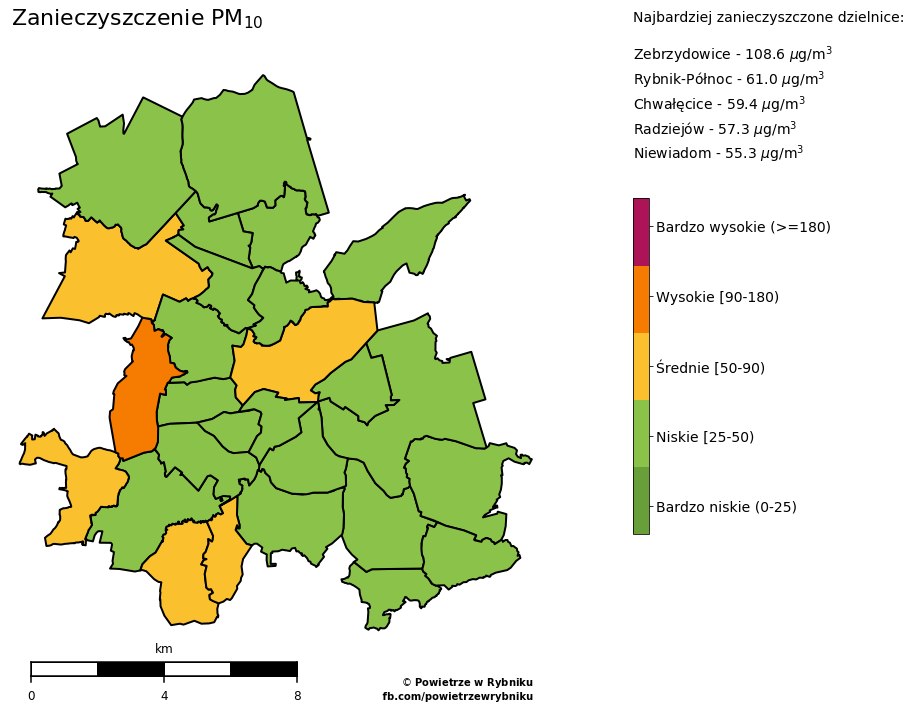

In [77]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['pm10'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(pm10_labels), cmap=cmap, shrink=0.5, labels=pm10_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value[15],1)) + r" $\mu$g/m$^3$" for _, value in df_map.sort_values(by='pm10', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)



# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Zanieczyszczenie PM$_{10}$".decode('utf-8'), fontsize=22, loc='left')


# this will set the image width to 1000px at 100dpi
plt.tight_layout()
fig.set_size_inches(12, 10)
plt.savefig('ryb-pm10.png', dpi=200, alpha=True)
plt.show()

# PM 2.5

In [78]:
pm25_labels = ['Bardzo niskie (0-15)',
 'Niskie [15-30)',
 'Średnie [30-55)',
 'Wysokie [55-110)',
    'Bardzo wysokie (>=110)']

for i, text in enumerate(pm25_labels):
    pm25_labels[i] = text.decode('utf-8')
    
from matplotlib import colors
cmap = colors.ListedColormap(['#689f38','#8bc34a','#fbc02d','#f57c00','#ad1457'])
bounds= [0,15,30,55,110,1000]
norm = colors.BoundaryNorm(bounds, cmap.N)

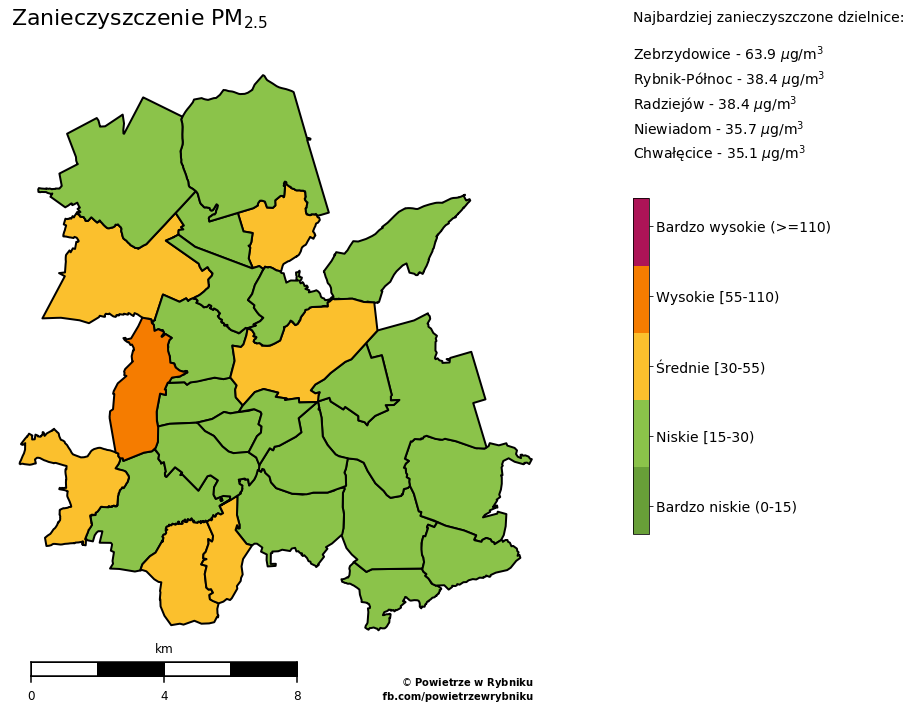

In [79]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.patch.set_facecolor('#ffffff')
# use a blue colour ramp - we'll be converting it to a map using cmap()
#cmap = plt.get_cmap('RdYlGn_r')
# draw wards with grey outlines
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(x, ec='#000000', lw=2., alpha=1., zorder=4))
pc = PatchCollection(df_map['patches'], match_original=True)
# impose our colour map onto the patch collection
#norm = Normalize()
pc.set_facecolor(cmap(norm(df_map['pm25'].values)))
ax.add_collection(pc)


# Add a colour bar
cb = colorbar_index(ncolors=len(pm25_labels), cmap=cmap, shrink=0.5, labels=pm25_labels)
cb.ax.tick_params(labelsize=14)


# Show highest densities, in descending order
highest = '\n'.join(
    value[1] + " - " + str(round(value[16],1)) + r" $\mu$g/m$^3$" for _, value in df_map.sort_values(by='pm25', ascending=False)[:5].iterrows()).decode('utf-8')


highest = 'Najbardziej zanieczyszczone dzielnice:\n\n' + highest
# Subtraction is necessary for precise y coordinate alignment
details = cb.ax.text(
    0., 1.55,
    highest,
    ha='left', va='top',
    size=14,
    color='#000000')

# Bin method, copyright and source data info
smallprint = ax.text(
    1.00, 0,
    '$\copyright$ Powietrze w Rybniku\n fb.com/powietrzewrybniku'.decode('utf-8'),
    ha='right', va='bottom',
    size=10,
    weight = 'bold',
    color='#000000',
    transform=ax.transAxes)



# Draw a map scale
m.drawmapscale(
    coords[0] + 0.06, coords[1] - 0.01,
    coords[0], coords[1], 
    8.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#000000',
    fontcolor='#000000', fontsize=12,
    zorder=5)


plt.title("Zanieczyszczenie PM$_{2.5}$".decode('utf-8'), fontsize=22, loc='left')


# this will set the image width to 1000px at 100dpi
plt.tight_layout()
fig.set_size_inches(12, 10)
plt.savefig('ryb-pm25.png', dpi=200, alpha=True)
plt.show()

In [80]:
df_map.columns

Index([                                 u'id',
                                  u'district',
                                      u'poly',
                                      u'name',
                            u'pollutionLevel',
                                    u'vendor',
                                   u'country',
                                  u'locality',
                                     u'route',
                              u'streetNumber',
                                  u'latitude',
                                 u'longitude',
                           u'airQualityIndex',
                                  u'humidity',
                                       u'pm1',
                                      u'pm10',
                                      u'pm25',
                        u'pollutionLevelhist',
                                  u'pressure',
                               u'temperature',
       u'currentMeasurements.airQualityIndex',
             

# Forecast

In [235]:
f_max = pd.DataFrame(columns=['airQualityIndex','humidity','pm1','pm10', 'pm25', 'pollutionLevel','pressure', 'temperature'])
for j in range(len(allData)):
    forecast = pd.pivot_table(pd.DataFrame.from_dict(allData[j].forecast[0][0]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')
    for i in range(len(allData[j].forecast[0])-1):
        forecast = pd.concat([forecast, pd.pivot_table(pd.DataFrame.from_dict(allData[j].forecast[0][i+1]).reset_index(), index=['fromDateTime', 'tillDateTime'], columns = 'index', values='measurements')])
    f_max = pd.concat([f_max, forecast.max(axis=0,level=None).to_frame().T])

In [237]:
forecast

,index,airQualityIndex,pm25,pollutionLevel
fromDateTime,tillDateTime,,,
2018-05-02T14:00:00Z,2018-05-02T14:59:59Z,12.867171,7.720303,1.0
2018-05-02T15:00:00Z,2018-05-02T15:59:59Z,14.377715,8.626629,1.0
